In [120]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [121]:
# index_col parameter required as the csv has an Id field that shouldn't be considered a feature 
df_train=pd.read_csv("../data/train.csv",index_col="Id")
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [274]:
df_train.sort_values(by='SalePrice', ascending=False).head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933


In [3]:
#check the column
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [116]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1457 non-null int64
MSZoning         1457 non-null object
LotFrontage      1198 non-null float64
LotArea          1457 non-null int64
Street           1457 non-null object
Alley            91 non-null object
LotShape         1457 non-null object
LandContour      1457 non-null object
Utilities        1457 non-null object
LotConfig        1457 non-null object
LandSlope        1457 non-null object
Neighborhood     1457 non-null object
Condition1       1457 non-null object
Condition2       1457 non-null object
BldgType         1457 non-null object
HouseStyle       1457 non-null object
OverallQual      1457 non-null int64
OverallCond      1457 non-null int64
YearBuilt        1457 non-null int64
YearRemodAdd     1457 non-null int64
RoofStyle        1457 non-null object
RoofMatl         1457 non-null object
Exterior1st      1457 non-null object
Exterior2nd      1457 non-

In [5]:
# Looking at some values for the feature
df_train['OverallQual'].describe()
# OverallQual is a range between 1-10

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

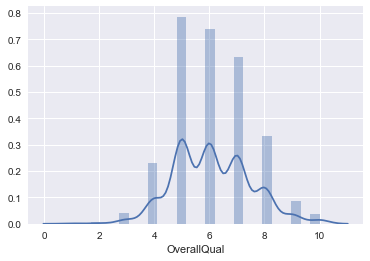

In [6]:
sns.distplot(df_train['OverallQual']);

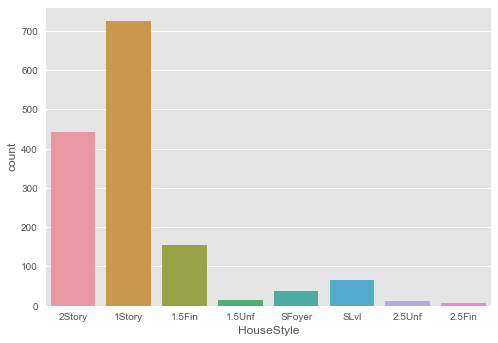

In [275]:
# HouseStyle is categorical feature
df_train['HouseStyle'].describe()
sns.countplot(x='HouseStyle', data=df_train)

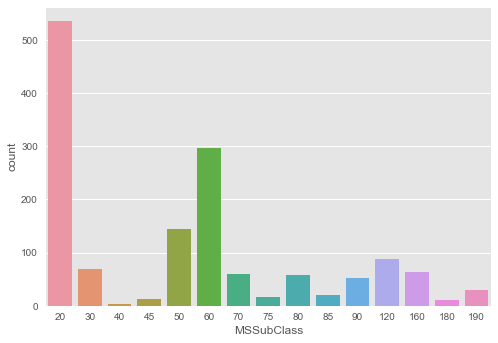

In [276]:
# MSSubClass is categorical feature
df_train['MSSubClass'].describe()
sns.countplot(x='MSSubClass', data=df_train)

In [9]:
# SalePrice
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

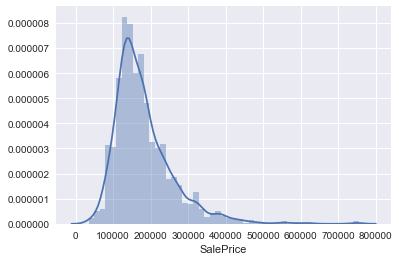

In [10]:
sns.distplot(df_train['SalePrice']);

In [11]:
# Sales price desc
#Deviate from the normal distribution.
#Have appreciable positive skewness.
#Show peakedness.

In [12]:
#Skewness is a measure of symmetry, or more precisely, the lack of symmetry. 
#A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

#Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. 
#That is, data sets with high kurtosis tend to have heavy tails, or outliers. 
#Data sets with low kurtosis tend to have light tails, or lack of outliers. 
#A uniform distribution would be the extreme case.

#The histogram is an effective graphical technique for showing both the skewness and kurtosis of data set.

In [13]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## Now lets try to find out Sales Price relationship with features

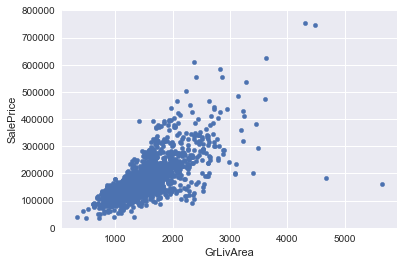

In [14]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [15]:
# GrLivArea/Sales Price seems to have almost linear realationship

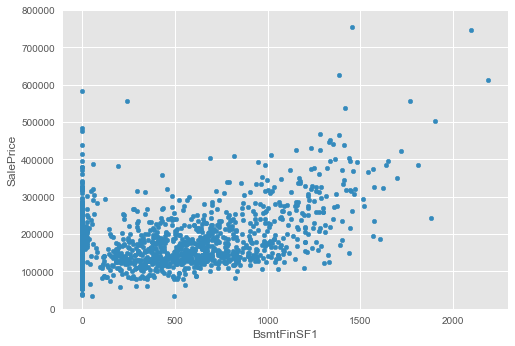

In [393]:
#scatter plot totalbsmtsf/saleprice
var = 'BsmtFinSF1'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# Relationship with categorical features

In [17]:
def drawCategoricalFeatureRelationship(feature):
    data = pd.concat([df_train['SalePrice'], df_train[feature]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=feature, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);
    plt.xticks(rotation=90);

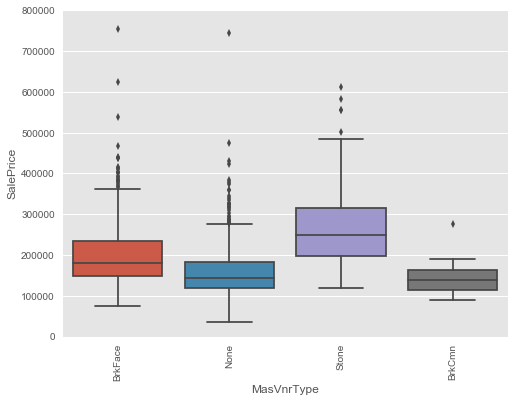

In [394]:
#box plot overallqual/saleprice
drawCategoricalFeatureRelationship('MasVnrType')

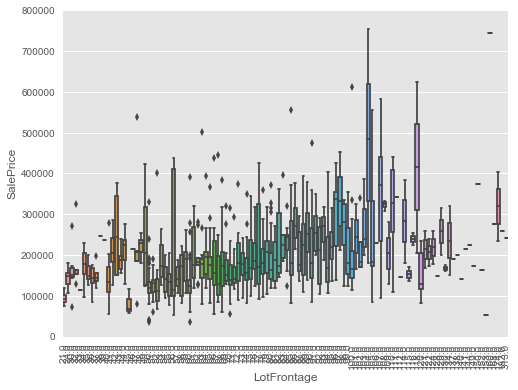

In [338]:
#box various categorical features &  selecting the ones that seem to have association with Sale price
drawCategoricalFeatureRelationship('LotFrontage')

Here are the list of catgorical features we select:

Condition2<br/>
RoofMatl<br/>
BsmtQual<br/>
Heating<br/>
CentralAir<br/>
Electrical<br/>
KitchenQual<br/>
FireplaceQu<br/>
GarageType<br/>
GarageFinish<br/>
YearBuilt<br/>
#PoolQC - seems to have dependency but too small sample<br/>
SaleCondition<br/>

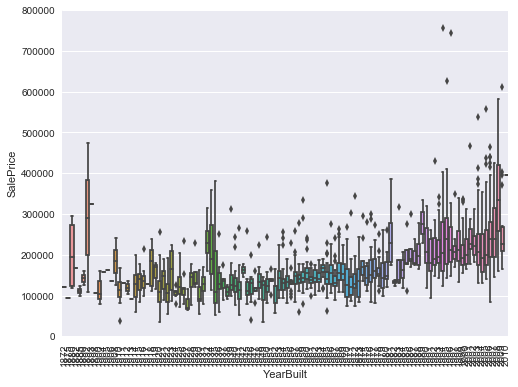

In [20]:
#box plot Year/saleprice
drawCategoricalFeatureRelationship('YearBuilt')

<b>In summary</b>
<p>Stories aside, we can conclude that:</p>

<p>'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.</p>
<p>'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.
We just analysed four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).
</p>

<p><b>To explore the universe, we will start with some practical recipes to make sense of our 'plasma soup':</b></p>

<li>Correlation matrix (heatmap style).</li>
<li>'SalePrice' correlation matrix (zoomed heatmap style).</li>
<li>Scatter plots between the most correlated variables</li>

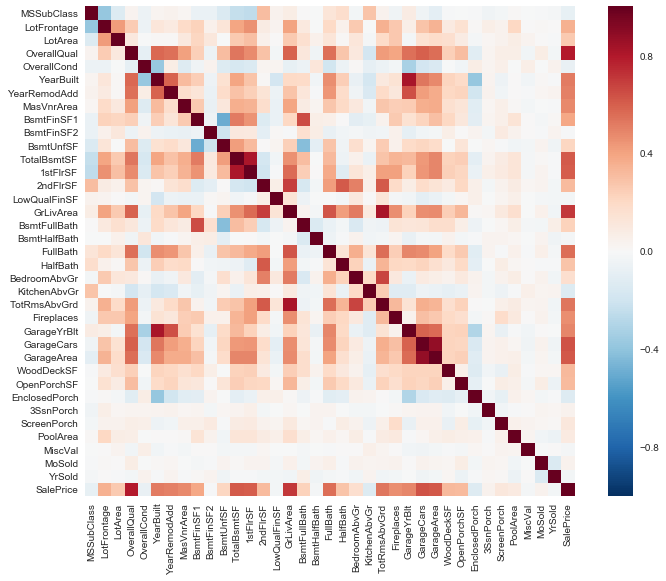

In [21]:
#correlation matrix
corrmat = df_train.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [22]:
#corrmat

In [23]:
# TotalBasemenetSF & 1stFlrSF can be treated as a single feature as they are related. Will choose TotalBasemenetSF
# Similarly GarageCars & GarageArea is related will choose GarageArea

In [24]:
# Hence best correlation exist with OverallQual, GrLiveArea, TotalBasemenetSF, GarageArea

# SalePrice' correlation matrix (zoomed heatmap style)

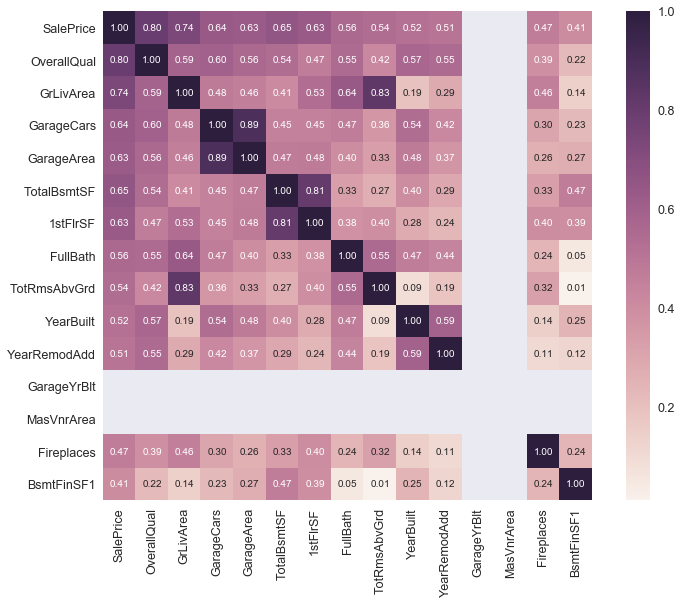

In [344]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Scatter plots between 'SalePrice' and correlated variables

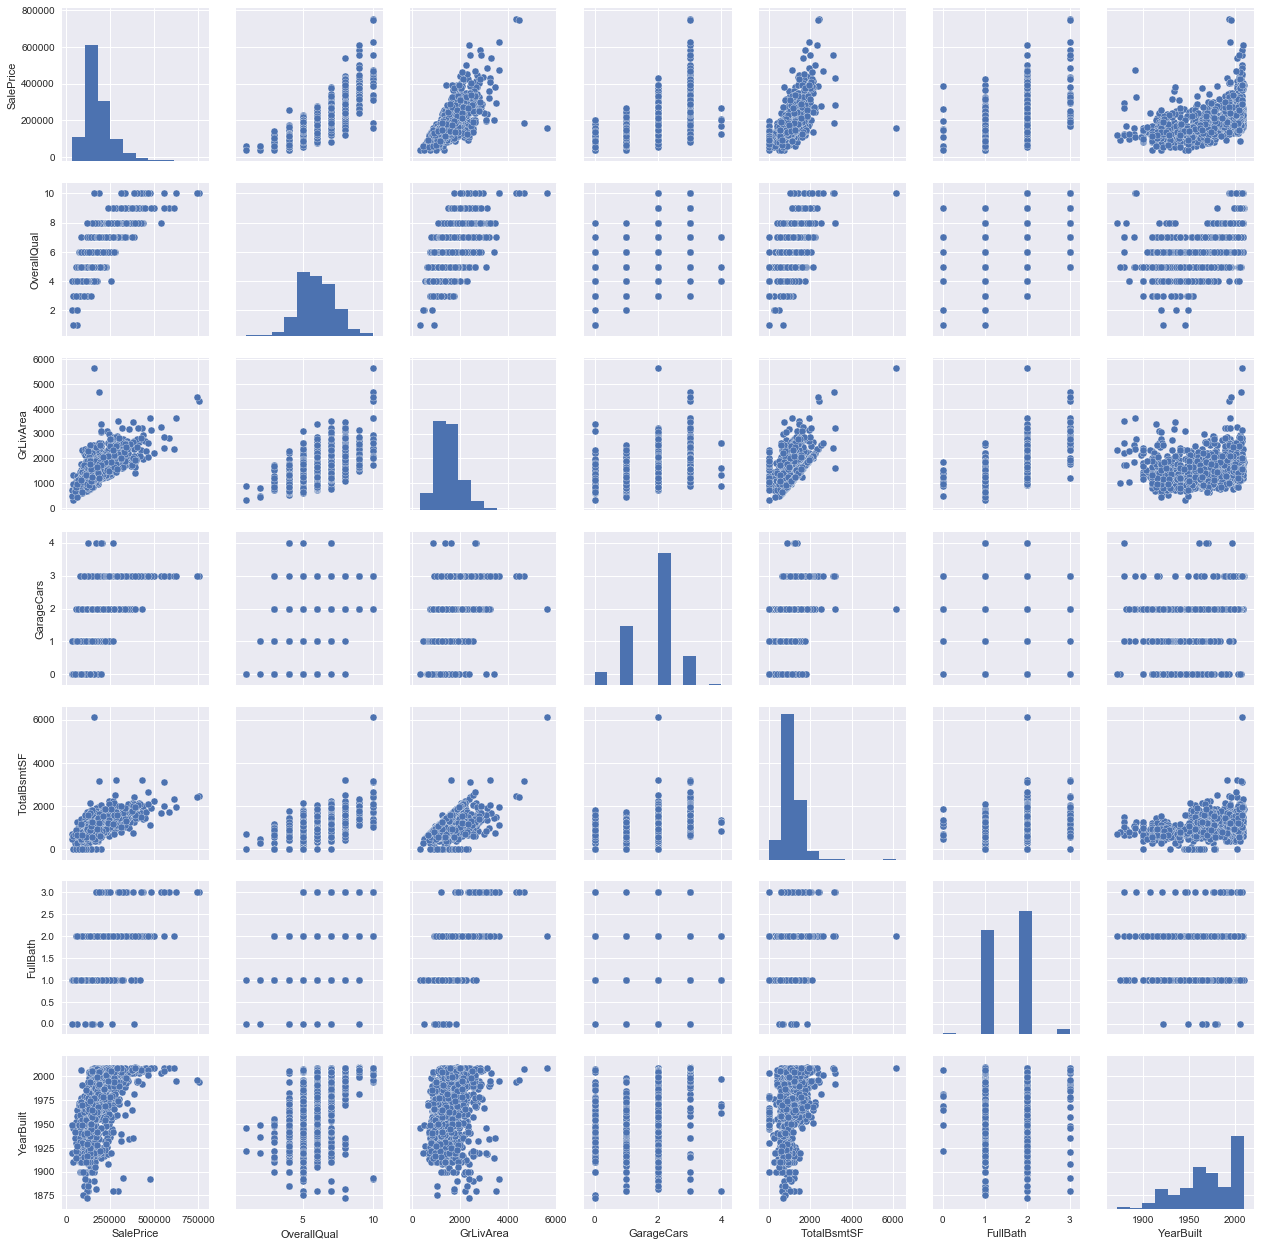

In [26]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Based on the heatmap seems like the following features are most closely related to Sales Price <br/>
'OverallQual', 'GrLivArea', 'GarageCars' (or Garage Area), 'TotalBsmtSF', 'FullBath'

# Lets check for outliers & remove them

I dont really see an outlier for between SalesPrice/OverallQual

I see 2 outliers for GrLivArea, these have the largest GrLivArea but low Sales Price. 
Lets examine what's going on there

In [27]:
df_train.sort_values(by='GrLivArea', ascending=False).head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000


<p>As we dont see anything unusual about the firt 2 rows with respect to the selected features, we can remove them
from our dataset</p>

In [28]:
df_train = df_train.drop([1299, 524])
df_train.sort_values(by='GrLivArea', ascending=False).head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
305,75,RM,87.0,18386,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,295000


For Garage cars seems the Sales price increase with more cars by goes down when its a 4 car garage. Seems a bit counter intuitive, lets examine

In [29]:
df_train.sort_values(by='GarageCars', ascending=False)[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath','SalePrice']][:20]

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,SalePrice
Id,,,,,,
1341,4,872,4,858,1,123000
421,7,1344,4,1344,2,206300
1191,4,1622,4,1249,1,168000
1351,5,2634,4,1248,2,200000
748,7,2640,4,1240,1,265979
804,9,2822,3,1734,3,582933
197,7,1726,3,1726,2,311872
518,7,2344,3,1264,2,265000
200,8,1713,3,1713,2,274900


At a first glance, the ones with 4 garage cars dont seem to be outliers as either they have either low quality or low GrLive area. Lets leave them for now

For TotalBsmtSF there is one point that seems really off. Lets check that out

In [30]:
df_train.sort_values(by='TotalBsmtSF', ascending=False)[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath','SalePrice']][:20]

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,SalePrice
Id,,,,,,
333,8,1629,3,3206,2,284000
497,8,3228,2,3200,3,430000
441,10,2402,3,3094,2,555000
1374,10,2633,3,2633,2,466500
1045,8,2524,2,2524,2,278000
692,10,4316,3,2444,3,755000
1183,10,4476,3,2396,3,745000
225,10,2392,3,2392,2,386250
899,9,2364,3,2330,2,611657


This one point seems to be an outlier as there is no indication why the sales price will be so low for large TotalBsmtSF values even though all other features seem fine.

In [31]:
df_train = df_train.drop([333])

In [32]:

df_train.sort_values(by='TotalBsmtSF', ascending=False)[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath','SalePrice']].head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,SalePrice
Id,,,,,,
497,8,3228,2,3200,3,430000
441,10,2402,3,3094,2,555000
1374,10,2633,3,2633,2,466500
1045,8,2524,2,2524,2,278000
692,10,4316,3,2444,3,755000


Lets trim down the dataframe to selected features & target columns

In [33]:
df_train['Electrical'].describe()

count      1456
unique        5
top       SBrkr
freq       1331
Name: Electrical, dtype: object

In [395]:
features_df = pd.concat([df_train['OverallQual'], 
                         df_train['GrLivArea'],
                         df_train['GarageCars'], 
                         df_train['TotalBsmtSF'],
                         df_train['FullBath'],
                         df_train['Neighborhood'],
                         df_train['Condition2'],
                         df_train['RoofMatl'], 
                         df_train['BsmtQual'],
                         df_train['Heating'],
                         df_train['CentralAir'], 
                         df_train['Electrical'],
                         df_train['KitchenQual'], 
                         df_train['GarageType'],
                         df_train['YearBuilt'],
                         df_train['MasVnrType'],
                         df_train['SaleCondition'], 
                         df_train['GarageFinish']],
                         axis=1)

In [396]:
features_df.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,Neighborhood,Condition2,RoofMatl,BsmtQual,Heating,CentralAir,Electrical,KitchenQual,GarageType,YearBuilt,MasVnrType,SaleCondition,GarageFinish
Id,,,,,,,,,,,,,,,,,,
1,7,1710,2,856,2,CollgCr,Norm,CompShg,Gd,GasA,Y,SBrkr,Gd,Attchd,2003,BrkFace,Normal,RFn
2,6,1262,2,1262,2,Veenker,Norm,CompShg,Gd,GasA,Y,SBrkr,TA,Attchd,1976,None,Normal,RFn
3,7,1786,2,920,2,CollgCr,Norm,CompShg,Gd,GasA,Y,SBrkr,Gd,Attchd,2001,BrkFace,Normal,RFn
4,7,1717,3,756,1,Crawfor,Norm,CompShg,TA,GasA,Y,SBrkr,Gd,Detchd,1915,None,Abnorml,Unf
5,8,2198,3,1145,2,NoRidge,Norm,CompShg,Gd,GasA,Y,SBrkr,Gd,Attchd,2000,BrkFace,Normal,RFn


In [368]:
len(features_df)

1457

In [397]:
# One-Hot encoding categorical columns
features_df = pd.get_dummies(data=features_df, columns=['Condition2', 'Neighborhood','RoofMatl','BsmtQual',
                                                        'Heating',
                                                        'CentralAir',
                                                        'Electrical',
                                                        'KitchenQual','GarageType',
                                                         'YearBuilt',
                                                        'SaleCondition',
                                                        'MasVnrType',
                                                        'GarageFinish'],dummy_na=True)
#features_df = features_df.fillna(0)  # convert Nan to 0
features_df.values[:10]

array([[   7, 1710,    2, ...,    1,    0,    0],
       [   6, 1262,    2, ...,    1,    0,    0],
       [   7, 1786,    2, ...,    1,    0,    0],
       ...,
       [   7, 2090,    2, ...,    1,    0,    0],
       [   7, 1774,    2, ...,    0,    1,    0],
       [   5, 1077,    1, ...,    1,    0,    0]])

In [398]:
# Lets use PCA to decrease the # of features
from sklearn import decomposition
pca = decomposition.PCA(n_components=8)
pca.fit(features_df)
features_df = pca.transform(features_df)

In [399]:
# normalize feature values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features_df)
features_df = scaler.transform(features_df)

scaler.fit(features_test)
features_test = scaler.transform(features_test)

In [400]:
#input_feature[:10]

In [401]:
target_df = pd.concat([df_train['SalePrice']], axis=1)
#scaler.fit(target_df)
#target_df = scaler.transform(target_df)

In [402]:
target_df.values[:10]

array([[208500],
       [181500],
       [223500],
       [140000],
       [250000],
       [143000],
       [307000],
       [200000],
       [129900],
       [118000]])

In [403]:
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features_df, target_df.values, test_size=0.1, random_state=42)

In [404]:
features_train[:5]

array([[0.41819049, 0.6133157 , 0.3823428 , 0.372458  , 0.24696764,
        0.64179191, 0.45551461, 0.36426246],
       [0.55583609, 0.59818384, 0.25883622, 0.53865638, 0.54424555,
        0.45447535, 0.50113674, 0.61896186],
       [0.36328884, 0.5869455 , 0.24962732, 0.27480072, 0.28227   ,
        0.48146701, 0.25823927, 0.20934771],
       [0.23910061, 0.40238564, 0.52783102, 0.32962826, 0.57791345,
        0.62163945, 0.36267754, 0.12886998],
       [0.41439205, 0.6847035 , 0.71402088, 0.56302914, 0.40075219,
        0.34671352, 0.47911383, 0.40561616]])

In [424]:
labels_test[:10]

array([[130000],
       [181000],
       [222000],
       [ 84900],
       [315500],
       [137500],
       [311500],
       [138000],
       [158000],
       [135500]])

## We'll now try varios ML models to see what give us the lowest validation error

In [406]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=5)
clf = clf.fit(features_train, labels_train)
clf.score(features_test, labels_test)

0.8454946159581553

In [407]:
# Linear Regression
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf = clf.fit(features_train, labels_train)
clf.score(features_test, labels_test)

0.8259866787506872

In [408]:
# Support Vector Regression
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear')
svr_lin.fit(features_train, labels_train)
svr_lin.score(features_test, labels_test)

-0.05673331140646365

In [409]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
randomForestReg = RandomForestRegressor(n_estimators=100, n_jobs=-1)
randomForestReg = randomForestReg.fit(features_train, labels_train)
preds_test = randomForestReg.predict(features_test)
randomForestReg.score(features_test, labels_test)
#print(preds_test[:10])

0.8754388316657529

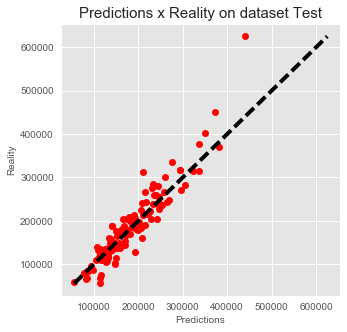

In [410]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

fig, ax = plt.subplots(figsize=(5, 5))

plt.style.use('ggplot')
plt.plot(preds_test, labels_test, 'ro')
plt.xlabel('Predictions', fontsize = 10)
plt.ylabel('Reality', fontsize = 10)
plt.title('Predictions x Reality on dataset Test', fontsize = 15)
ax.plot([labels_test.min(), labels_test.max()], [labels_test.min(), labels_test.max()], 'k--', lw=4)
plt.show()

In [418]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gradientBoostingRegressor = GradientBoostingRegressor(n_estimators=300)
gradientBoostingRegressor = gradientBoostingRegressor.fit(features_train, labels_train)
gradientBoostingRegressor.score(features_test, labels_test)

0.8697736430436531

In [421]:
from xgboost.sklearn import XGBRegressor  
from sklearn.metrics import r2_score

import scipy.stats as st

#one_to_left = st.beta(10, 1)  
#from_zero_positive = st.expon(0, 50)


# A parameter grid for XGBoost
params = {'min_child_weight':[i for i in range(1,20)], 'gamma':[i/10.0 for i in range(3,10)],  
          'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [i for i in range(1,10)]}

xgbreg = XGBRegressor(nthreads=5)  

from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(xgbreg, params, n_jobs=10)  
gs.fit(features_train, labels_train)  
print(gs.score(features_test, labels_test))
preds_test = gs.predict(features_test)

0.8820780396928828


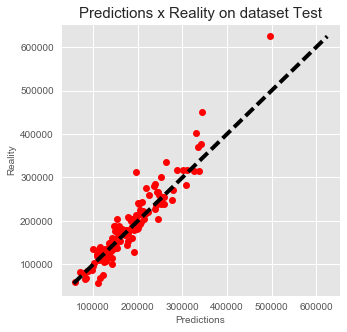

In [423]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

fig, ax = plt.subplots(figsize=(5, 5))

plt.style.use('ggplot')
plt.plot(preds_test, labels_test, 'ro')
plt.xlabel('Predictions', fontsize = 10)
plt.ylabel('Reality', fontsize = 10)
plt.title('Predictions x Reality on dataset Test', fontsize = 15)
ax.plot([labels_test.min(), labels_test.max()], [labels_test.min(), labels_test.max()], 'k--', lw=4)
plt.show()

In [212]:
# Create DF from test.csv
df_test = pd.read_csv('../data/test.csv', index_col='Id')
test_filtered_df = pd.concat([df_test['OverallQual'], 
                         df_test['GrLivArea'],
                         df_test['GarageCars'], 
                         df_test['TotalBsmtSF'],
                         df_test['FullBath'],
                         df_test['Condition2'],
                         df_test['RoofMatl'], 
                         df_test['BsmtQual'],
                         df_test['Heating'],
                         df_test['CentralAir'], 
                         df_test['Electrical'],
                         df_test['KitchenQual'], 
                         df_test['GarageType'],
                         df_test['YearBuilt'],
                         df_test['SaleCondition'], 
                         df_test['GarageFinish']],
                         axis=1)

test_filtered_df = pd.get_dummies(data=test_filtered_df, columns=['Condition2', 'RoofMatl','BsmtQual','Heating',
                                                        'CentralAir','Electrical','KitchenQual','GarageType',
                                                       'YearBuilt','SaleCondition','GarageFinish'],dummy_na=True)


test_filtered_df = test_filtered_df.fillna(0)  # convert Nan to 0

# Lets use PCA to decrease the # of features
from sklearn import decomposition
pca = decomposition.PCA(n_components=5)
pca.fit(test_filtered_df)
test_filtered_df = pca.transform(test_filtered_df)

#test_filtered_df[:10]

In [213]:
# predict sale price for test
scaler = MinMaxScaler()
scaler.fit(test_filtered_df)
test_input_feature = scaler.transform(test_filtered_df)


preds = gs.predict(test_filtered_df)

In [214]:
preds[:10]

array([146162.06 , 478673.25 , 594701.7  , 499675.34 , 176693.89 ,
       124805.74 , 182829.72 , 118650.414, 553927.7  ,  68826.54 ],
      dtype=float32)

In [215]:
from IPython.display import FileLink, FileLinks
my_submission = pd.DataFrame({'Id': df_test.index, 'SalePrice': preds})
my_submission.to_csv('../submissions/submission4.csv', index=False)
FileLink("../submissions/submission4.csv")

/Users/rishikhanna/kaggle/House Prices/kaggle-homeprices/submissions/submission4.csv

In [90]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [101]:
import keras
seed = 100
np.random.seed(seed)

model = Sequential()
model.add(Dense(32, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
optimizer =keras.optimizers.Adam(lr=25, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.1, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['accuracy'])

# train model
print(features_train[:5])
print(labels_train[:5])

history = model.fit(features_train, labels_train, epochs=10, batch_size=100, verbose=2)
# plot metrics
#pyplot.plot(history.history['mean_squared_error'])
#pyplot.plot(history.history['mean_absolute_error'])
#pyplot.plot(history.history['mean_absolute_percentage_error'])
#pyplot.plot(history.history['cosine_proximity'])
#pyplot.show()

[[   7 2057    1 1017]
 [   9 2599    3 1393]
 [   7 1797    2  939]
 [   5 1040    1 1040]
 [   5 2138    2  849]]
[[250000]
 [333168]
 [213500]
 [133700]
 [106000]]
Epoch 1/10
 - 1s - loss: 18746757050521.0938 - acc: 0.0000e+00
Epoch 2/10
 - 0s - loss: 38950724369.7696 - acc: 0.0000e+00
Epoch 3/10
 - 0s - loss: 38950396175.8169 - acc: 0.0000e+00
Epoch 4/10
 - 0s - loss: 38948791165.5591 - acc: 0.0000e+00
Epoch 5/10
 - 0s - loss: 38947060519.6400 - acc: 0.0000e+00
Epoch 6/10
 - 0s - loss: 38945418648.5065 - acc: 0.0000e+00
Epoch 7/10
 - 0s - loss: 38943874634.5934 - acc: 0.0000e+00
Epoch 8/10
 - 0s - loss: 38942434845.2906 - acc: 0.0000e+00
Epoch 9/10
 - 0s - loss: 38941062875.8749 - acc: 0.0000e+00
Epoch 10/10
 - 0s - loss: 38939761610.1053 - acc: 0.0000e+00


In [65]:
from sklearn.metrics import r2_score

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

scale = StandardScaler()
X_train = scale.fit_transform(features_train)
X_test = scale.fit_transform(features_test)

#print(X_train[:10])
#print(labels_train[:10])
# evaluate model with standardized dataset
reg = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=20,verbose=0)
reg.fit(X_train, labels_train)
prediction = reg.predict(X_test)
print(prediction[:10])
r2 = r2_score( labels_test, prediction )
print(r2)
#train_error =  np.abs(labels_test - prediction)
#mean_error = np.mean(train_error)
#min_error = np.min(train_error)
#max_error = np.max(train_error)
#std_error = np.std(train_error)

[ 8.450739   6.1634555  9.123552  13.805744  19.909824   4.652865
  7.6245637  4.8971953  6.540297   6.934915 ]
-5.032421777125966


In [59]:

np.random.seed(seed)

clf = KerasRegressor(build_fn=base_model, nb_epoch=100, batch_size=5,verbose=0)

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, features_train, labels_train, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -37686209649.73 (3123569040.58) MSE
